<a href="https://colab.research.google.com/github/mrMichalR/Fake_news_detection_transformer/blob/main/fake_news_detection_using_transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake news detection using transformers


In [ ]:
!pip install pandas_profiling
!pip install torch
!pip install optuna
!pip install wordcloud
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 36.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=7b32572af06d46c3dab141a8f1053206d201ab9bbb9bed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.7/365.7 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 11.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.2 MB/s eta 0:00:00
 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import os, sys
from sklearn.utils import resample
from tqdm import tqdm
import tqdm
import string
import matplotlib.pyplot as plt
import re
import nltk
import torch
import torch.optim as optim
import torch.nn as nn
import optuna
import copy
import torch.optim as opti
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error
import torch.autograd as autograd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

<ipython-input-2-c658a636a853>:21: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd drive/MyDrive/week2

Mounted at /content/drive
/content/drive/MyDrive/week2


## Datasets
Get datasets from Kaggle.

1. WELFake <br>
https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification
2. Fake & Real <br>
https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset?select=True.csv
3. Fake news net <br>
https://www.kaggle.com/datasets/algord/fake-news



In [ ]:
root = os.getcwd()
path = os.path.join(root, ".csv")
files_list=[]

for path, subdirs, files in os.walk(root):
  for name in files:
    temp_file = os.path.join(path, name)
    print(temp_file)
    files_list.append(temp_file)

# print(files_list)

/content/drive/MyDrive/week2/Fake.csv
/content/drive/MyDrive/week2/True.csv
/content/drive/MyDrive/week2/FakeNewsNet.csv
/content/drive/MyDrive/week2/WELFake_Dataset.csv
/content/drive/MyDrive/week2/output3.html
/content/drive/MyDrive/week2/output1.html
/content/drive/MyDrive/week2/output2.html
/content/drive/MyDrive/week2/ProfileReport1.html
/content/drive/MyDrive/week2/ProfileReport3.html
/content/drive/MyDrive/week2/ProfileReport2.html
/content/drive/MyDrive/week2/df2_downsampled_Fake_&_Real.csv
/content/drive/MyDrive/week2/df2_downsampled.csv
/content/drive/MyDrive/week2/df1_downsampled.csv
/content/drive/MyDrive/week2/df3_downsampled.csv


In [ ]:
df_fake = pd.read_csv(files_list[0])
df_true = pd.read_csv(files_list[1])
df_fake['fake'] = 1
df_true['fake'] = 0

df1=pd.concat([df_fake, df_true], axis=0, ignore_index=False)
print(f'DataFrame of {files_list[0]} and {files_list[1]} file')
df1

DataFrame of /content/drive/MyDrive/week2/Fake.csv and /content/drive/MyDrive/week2/True.csv file


,title,text,subject,date,fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


**ATTENTION !**
Due to memory use datasets are sampled to 5000 records each.

In [ ]:
df1 = df1.drop(['subject', 'date','text'], axis=1)
# df1 = df1.sample(5000)
df1

,title,fake
0,Donald Trump Sends Out Embarrassing New Year’...,1
1,Drunk Bragging Trump Staffer Started Russian ...,1
2,Sheriff David Clarke Becomes An Internet Joke...,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,1
4,Pope Francis Just Called Out Donald Trump Dur...,1
...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,0
21413,LexisNexis withdrew two products from Chinese ...,0
21414,Minsk cultural hub becomes haven from authorities,0
21415,Vatican upbeat on possibility of Pope Francis ...,0


**ATTENTION!** In dataset 2 taken sample size 10000 to have similar target negative values as in dataset 1 and 3.

In [ ]:
df2=pd.read_csv(files_list[2])
df2.rename(columns = {'real':'fake'}, inplace = True)
df2 = df2.drop(['news_url', 'source_domain','tweet_num'], axis=1)
# df2 = df2.sample(5000)
df2

,title,fake
0,Kandi Burruss Explodes Over Rape Accusation on...,1
1,People's Choice Awards 2018: The best red carp...,1
2,Sophia Bush Sends Sweet Birthday Message to 'O...,1
3,Colombian singer Maluma sparks rumours of inap...,1
4,Gossip Girl 10 Years Later: How Upper East Sid...,1
...,...,...
23191,Pippa Middleton wedding: In case you missed it...,1
23192,Zayn Malik & Gigi Hadid’s Shocking Split: Why ...,0
23193,Jessica Chastain Recalls the Moment Her Mother...,1
23194,"Tristan Thompson Feels ""Dumped"" After Khloé Ka...",0


In [ ]:
df3 = pd.read_csv(files_list[3])
df3.rename(columns = {'label':'fake'}, inplace = True)
df3 = df3.drop(['Unnamed: 0','text'], axis=1)
# df3 = df3.sample(2500)
df3

,title,fake
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,1
1,NaN,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",0
4,SATAN 2: Russia unvelis an image of its terrif...,1
...,...,...
72129,Russians steal research on Trump in hack of U....,0
72130,WATCH: Giuliani Demands That Democrats Apolog...,1
72131,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,Trump tussle gives unpopular Mexican leader mu...,0


All 3 in 1 list

In [ ]:
df_list = []
df_list.append(df1)
df_list.append(df2)
df_list.append(df3)

## Data analysis
Analyze the data and perform exploratory data analysis.

1. Check if the dataset is balanced - if not think about methods to acquire balance.
2. Use pandas-profiler


In [ ]:
target='fake'
for number, elem in zip(range(1,4), df_list):
  print(f'Target value counts for df{number}:\n{elem[target].value_counts()}\nSUM:{len(elem)}\n')

Target value counts for df1:
1    23481
0    21417
Name: fake, dtype: int64
SUM:44898

Target value counts for df2:
1    17441
0     5755
Name: fake, dtype: int64
SUM:23196

Target value counts for df3:
1    37106
0    35028
Name: fake, dtype: int64
SUM:72134



In [ ]:
# check duplicates in dataset
for number, elem in zip(range(1,4), df_list):
  print(f'Duplicates for df{number}:\n{elem.duplicated(keep="last").sum()}\n')

Duplicates for df1:
6169

Duplicates for df2:
1349

Duplicates for df3:
9782



In [ ]:
# drop duplicates in dataframes
for number, elem in zip(range(1,4), df_list):
  elem.drop_duplicates(keep="last", inplace=True)
  print(f'Target value counts for df{number}:\n{elem[target].value_counts()}\nSUM:{len(elem)}\n')

Target value counts for df1:
0    20826
1    17903
Name: fake, dtype: int64
SUM:38729

Target value counts for df2:
1    16524
0     5323
Name: fake, dtype: int64
SUM:21847

Target value counts for df3:
0    34409
1    27943
Name: fake, dtype: int64
SUM:62352



In [ ]:
for number, elem in zip(range(1,4), df_list):
  print(f'Target imbalance for df{number}:\n{(elem[target].value_counts()[1]*100/elem[target].value_counts()[0]-100).round(2)} %\n')

Target imbalance for df1:
-14.04 %

Target imbalance for df2:
210.43 %

Target imbalance for df3:
-18.79 %



**Pandas profiling**

Due to quite big of datasets minimal=True.

Other solution is to take sample 10000 into account.

In [ ]:
description = "Disclaimer: this profiling report was generated using minimal mode"

for number, elem in zip(range(1,4), df_list):
  prof = elem.profile_report(dataset={"description": description}, minimal=True)
  prof.to_notebook_iframe()
  prof.to_file(output_file=f'ProfileReport{number}.html')

### Summary
- All 3 datasets are unbalanced

For further investigation:
- Oversample minority class

or

- Undersample majority class

## Data preprocessing
Use preprocessing methods.

1. Think how to handle nulls and nan values

2. Propose other techniques to data preprocessing

In [ ]:
# check for nan values
for number, elem in zip(range(1,4), df_list):
  print(f'Missing values in df{number}:\n{elem.isna().sum()} %\n')

Missing values in df1:
title    0
fake     0
dtype: int64 %

Missing values in df2:
title    0
fake     0
dtype: int64 %

Missing values in df3:
title    1
fake     0
dtype: int64 %



In [ ]:
# drop nan values
for number, elem in zip(range(1,4), df_list):
  elem.dropna(inplace=True)
  print(f'Target value counts for df{number}:\n{elem[target].value_counts()}\nSUM:{len(elem)}\n')

Target value counts for df1:
0    20826
1    17903
Name: fake, dtype: int64
SUM:38729

Target value counts for df2:
1    16524
0     5323
Name: fake, dtype: int64
SUM:21847

Target value counts for df3:
0    34409
1    27942
Name: fake, dtype: int64
SUM:62351



### Undersampling (majority class)

In [ ]:
df1_majority = df1[df1['fake'] == 0]
df1_minority = df1[(df1['fake'] == 1)]

df1_majority_downsampled = resample(df1_majority, replace = True, n_samples = len(df1_minority), random_state = 42)
df1_downsampled = pd.concat([df1_minority, df1_majority_downsampled])
df1_downsampled.to_csv('df1_downsampled.csv', index=False)

df1 = df1_downsampled
df_list[0] = df1_downsampled
print(f'Target value in df1 after udersampling:\n{df_list[0].fake.value_counts()}')


df2_majority = df2[df2['fake'] == 1]
df2_minority = df2[(df2['fake'] == 0)]

df2_majority_downsampled = resample(df2_majority, replace = True, n_samples = len(df2_minority), random_state = 42)
df2_downsampled = pd.concat([df2_minority, df2_majority_downsampled])
df2_downsampled.to_csv('df2_downsampled.csv', index=False)

df2 = df2_downsampled
df_list[1] = df2_downsampled
print(f'Target value in df2 after udersampling:\n{df_list[1].fake.value_counts()}')


df3_majority = df3[df3['fake'] == 0]
df3_minority = df3[(df3['fake'] == 1)]

df3_majority_downsampled = resample(df3_majority, replace = True, n_samples = len(df3_minority), random_state = 42)
df3_downsampled = pd.concat([df3_minority, df3_majority_downsampled])
df3_downsampled.to_csv('df3_downsampled.csv', index=False)

df3 = df3_downsampled
df_list[2] = df3_downsampled
print(f'Target value in df3 after udersampling:\n{df_list[2].fake.value_counts()}')

Target value in df1 after udersampling:
1    17903
0    17903
Name: fake, dtype: int64
Target value in df2 after udersampling:
0    5323
1    5323
Name: fake, dtype: int64
Target value in df3 after udersampling:
1    27942
0    27942
Name: fake, dtype: int64


### WordCLoud

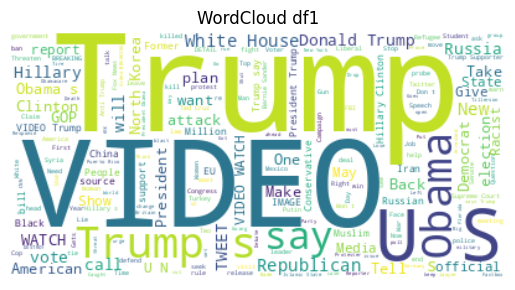

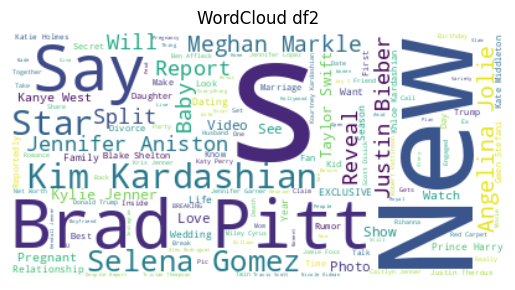

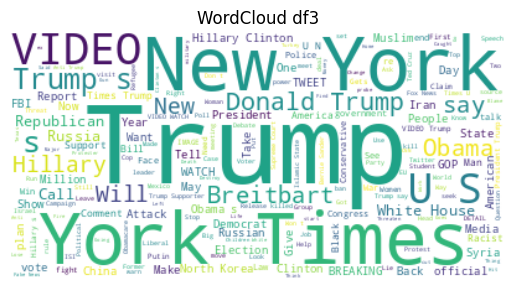

In [ ]:
def generate_text(df_column):
  text = " ".join(title for title in df_column)
  return text

text1 = generate_text(df1['title'])
text2 = generate_text(df2['title'])
text3 = generate_text(df3['title'])


# Generate a word cloud image
def wordcloud(text):
  stopwords = set(STOPWORDS)
  return WordCloud(stopwords=stopwords, background_color="white").generate(text)

wordcloud1 = wordcloud(text1)
wordcloud2 = wordcloud(text2)
wordcloud3 = wordcloud(text3)


# Display the generated image using matplotlib:
plt.imshow(wordcloud1, interpolation='bilinear')
plt.title("WordCloud df1")
plt.axis("off")
plt.show()
print('\n')

plt.imshow(wordcloud2, interpolation='bilinear')
plt.title("WordCloud df2")
plt.axis("off")
plt.show()
print('\n')

plt.imshow(wordcloud3, interpolation='bilinear')
plt.title("WordCloud df3")
plt.axis("off")
plt.show()
print('\n')

## Data quality
Check the quality of your data

Source: https://www.geeksforgeeks.org/text-preprocessing-in-python-set-1/?ref=lbp  &  https://www.datacamp.com/tutorial/text-classification-python

1. Convert them to lower or upper case
2. Cut “stopwords”
3. Convert words to their stem or lemma
4. Plan how do you want to divide each sentence? There are a lot of tokenizers?
5. *remove all special characters
6. *remove digits
7. *remove punctuation
8. *remove whitespace

In [ ]:
def clean_data(dataframe):
  input_data = list(dataframe)
  corpus = []
  text = list(dataframe)
  for i in range(len(text)):
          # remove all special characters
          tokens = re.sub('[^a-zA-Z]', ' ', text[i])
          # remove digits
          tokens = re.sub(r'\d+', '', tokens)
          # to lower case
          tokens = tokens.lower()
          # tokenize
          tokens = word_tokenize(tokens)  #alternative tokens = tokens.split()
          # remove punctuation
          tokens = [word for word in tokens if word.isalpha()]
          # filter out short tokens (<=1 character)
          tokens = [word for word in tokens if len(word) > 1]
          # remove stopwords
          tokens = [word for word in tokens if word not in stopwords.words('english')]
          # lemmatize
          tokens = [lemmatizer.lemmatize(word) for word in tokens]
          # tokens = [lemmatizer.lemmatize(word, pos ='v') for word in tokens] #lemmatize with provide context i.e. part-of-speech -> pos
          # remove whitespace
          tokens = ' '.join(tokens)

          corpus.append(tokens)

  # assign corpus to data column
  input_data = corpus
  return input_data

In [ ]:
for df in tqdm.tqdm(df_list):
  df['title'] = clean_data(df['title'])

100%|██████████| 3/3 [02:17<00:00, 45.72s/it]


### Sentence Transformer

In [ ]:
df1_st = df_list[0].copy()
df2_st = df_list[1].copy()
df3_st = df_list[2].copy()

In [ ]:
model = SentenceTransformer('all-MiniLM-L6-v2')

df1_title_st = model.encode(df1_st['title'].values.tolist())
df2_title_st = model.encode(df2_st['title'].values.tolist())
df3_title_st = model.encode(df3_st['title'].values.tolist())

In [ ]:
def get_vocab_size(df):
  return df.shape[1]

### Train, test split
Divide prepared dataset into three subsets.

Implement method to division dataset into training, validation and testing subsets.

Propose different divisions (in percentage):
1. 80/10/10
2. 70/15/15
3. 90/5/5

In [ ]:
# Create Feature and Label sets
X1_st = df1_title_st
y1_st = df1_st['fake']

X2_st = df2_title_st
y2_st = df2_st['fake']

X3_st = df3_title_st
y3_st = df3_st['fake']


# train, val & test split (80% train, 10% val, 10% test)
test_size_value = 0.2

#df1
X_train1, X_temp1, y_train1, y_temp1 = train_test_split(X1_st, y1_st, test_size=test_size_value, random_state=42)
X_val1, X_test1, y_val1, y_test1 = train_test_split(X_temp1, y_temp1, test_size=0.5, random_state=42)

print('Dataset 1 SentenceTransformer:')
print('X train:', X_train1.shape,'y train: ', y_train1.shape)
print('X val: ', X_val1.shape,'y val: ', y_val1.shape)
print('X test:', X_test1.shape,'y test: ', y_test1.shape)
print('\n')

#df2
X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X2_st, y2_st, test_size=test_size_value, random_state=42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, random_state=42)

print('Dataset 2 SentenceTransformer:')
print('X train:', X_train2.shape,'y train: ', y_train2.shape)
print('X val: ', X_val2.shape,'y val: ', y_val2.shape)
print('X test:', X_test2.shape,'y test: ', y_test2.shape)
print('\n')

#df3
X_train3, X_temp3, y_train3, y_temp3 = train_test_split(X3_st, y3_st, test_size=test_size_value, random_state=42)
X_val3, X_test3, y_val3, y_test3 = train_test_split(X_temp3, y_temp3, test_size=0.5, random_state=42)

print('Dataset 3 SentenceTransformer:')
print('X train:', X_train3.shape,'y train: ', y_train3.shape)
print('X val: ', X_val3.shape,'y val: ', y_val3.shape)
print('X test:', X_test3.shape,'y test: ', y_test3.shape)
print('\n')

Dataset 1 SentenceTransformer:
X train: (28644, 384) y train:  (28644,)
X val:  (3581, 384) y val:  (3581,)
X test: (3581, 384) y test:  (3581,)


Dataset 2 SentenceTransformer:
X train: (8516, 384) y train:  (8516,)
X val:  (1065, 384) y val:  (1065,)
X test: (1065, 384) y test:  (1065,)


Dataset 3 SentenceTransformer:
X train: (44707, 384) y train:  (44707,)
X val:  (5588, 384) y val:  (5588,)
X test: (5589, 384) y test:  (5589,)




## Logistic regression
Use PyTorch library.

1. Train logistic regression model using prepared training dataset
2. Test model using testing dataset
3. Use Optuna to find the best hyperparameters the for logistic regression.
4. Evaluate model using k-stratified fold Cross Validation using train, test and validation part of the dataset

Create tensors

In [ ]:
# tensors for all dataset
X1_tens = torch.tensor(X1_st, dtype=torch.float32)
y1_tens = torch.tensor(y1_st.values, dtype=torch.float32).reshape(-1,1)
print(X1_tens.shape,y1_tens.shape)

X2_tens = torch.tensor(X2_st, dtype=torch.float32)
y2_tens = torch.tensor(y2_st.values, dtype=torch.float32).reshape(-1,1)
print(X2_tens.shape,y2_tens.shape)

X3_tens = torch.tensor(X3_st, dtype=torch.float32)
y3_tens = torch.tensor(y3_st.values, dtype=torch.float32).reshape(-1,1)
print(X3_tens.shape,y3_tens.shape)

torch.Size([35806, 384]) torch.Size([35806, 1])
torch.Size([10646, 384]) torch.Size([10646, 1])
torch.Size([55884, 384]) torch.Size([55884, 1])


In [ ]:
# train tensors
X1_tens_train = torch.tensor(X_train1, dtype=torch.float32)
y1_tens_train = torch.tensor(y_train1.values, dtype=torch.float32).reshape(-1,1)
# print(X1_tens_train.shape,y1_tens_train.shape)

X2_tens_train = torch.tensor(X_train2, dtype=torch.float32)
y2_tens_train = torch.tensor(y_train2.values, dtype=torch.float32).reshape(-1,1)
# print(X2_tens_train.shape,y2_tens_train.shape)

X3_tens_train = torch.tensor(X_train3, dtype=torch.float32)
y3_tens_train = torch.tensor(y_train3.values, dtype=torch.float32).reshape(-1,1)
# print(X3_tens_train.shape,y3_tens_train.shape)


# validation tensors
X1_tens_val= torch.tensor(X_val1, dtype=torch.float32)
y1_tens_val = torch.tensor(y_val1.values, dtype=torch.float32).reshape(-1,1)
# print(X1_tens_train.shape,y1_tens_train.shape)

X2_tens_val = torch.tensor(X_val2, dtype=torch.float32)
y2_tens_val = torch.tensor(y_val2.values, dtype=torch.float32).reshape(-1,1)
# print(X2_tens_train.shape,y2_tens_train.shape)

X3_tens_val = torch.tensor(X_val3, dtype=torch.float32)
y3_tens_val = torch.tensor(y_val3.values, dtype=torch.float32).reshape(-1,1)
# print(X3_tens_train.shape,y3_tens_train.shape)


# test tensors
X1_tens_test = torch.tensor(X_test1, dtype=torch.float32)
y1_tens_test = torch.tensor(y_test1.values, dtype=torch.float32).reshape(-1,1)
# print(X1_tens_test.shape,y1_tens_test.shape)

X2_tens_test = torch.tensor(X_test2, dtype=torch.float32)
y2_tens_test = torch.tensor(y_test2.values, dtype=torch.float32).reshape(-1,1)
# print(X2_tens_test.shape,y2_tens_test.shape)

X3_tens_test = torch.tensor(X_test3, dtype=torch.float32)
y3_tens_test = torch.tensor(y_test3.values, dtype=torch.float32).reshape(-1,1)
# print(X1_tens_test.shape,y1_tens_test.shape)

In [ ]:
# build custom model Logistic Regression
class LogisticRegression(torch.nn.Module):
    # build the constructor
    def __init__(self, vocab_size, num_labels):
        super().__init__()
        self.linear = torch.nn.Linear(vocab_size, num_labels)
    # make predictions
    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

In [ ]:
def model_train(model, X_train, y_train, X_val, y_val):
    # loss function and optimizer
    loss_fn = nn.BCELoss()  # binary cross entropy
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    n_epochs = 10   # number of epochs to run
    batch_size = 10  # size of each batch
    batch_start = torch.arange(0, len(X_train), batch_size)

    # Hold the best model
    best_acc = - np.inf   # init to negative infinity
    best_weights = None

    for epoch in range(n_epochs):
        model.train()
        with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
            bar.set_description(f"Epoch {epoch}")
            for start in bar:
                # take a batch
                X_batch = X_train[start:start+batch_size]
                y_batch = y_train[start:start+batch_size]
                # forward pass
                y_pred = model(X_batch)
                loss = loss_fn(y_pred, y_batch)
                # backward pass
                optimizer.zero_grad()
                loss.backward()
                # update weights
                optimizer.step()
                # print progress
                acc = (y_pred.round() == y_batch).float().mean()
                bar.set_postfix(
                    loss=float(loss),
                    acc=float(acc)
                )
        # evaluate accuracy at end of each epoch
        model.eval()
        y_pred = model(X_val)
        acc = (y_pred.round() == y_val).float().mean()
        acc = float(acc)
        if acc > best_acc:
            best_acc = acc
            best_weights = copy.deepcopy(model.state_dict())

    # restore model and return best accuracy
    model.load_state_dict(best_weights)
    return best_acc

Evaluate model on each df test subset

In [ ]:
# create model, train, and get accuracy
model1 = LogisticRegression(get_vocab_size(df1_title_st),1)
acc1 = model_train(model1, X1_tens_train, y1_tens_train, X1_tens_val, y1_tens_val)
print("Accuracy (LogReg): %.2f" % acc1)


# evaluate the model on the test set
model1.eval()
with torch.no_grad():
  # Test out inference with 5 samples
  for i in range(5):
    y_pred1 = model1(X1_tens_test[i:i+1])
    print(f"{y_pred1[0].numpy()} " +
      f"(expected {y1_tens_test[i].numpy()})")

Accuracy (LogReg): 0.87
[0.746809] (expected [1.])
[0.5634439] (expected [1.])
[0.9126786] (expected [1.])
[0.93543166] (expected [1.])
[0.8189156] (expected [1.])


In [ ]:
# create model, train, and get accuracy
model2 = LogisticRegression(get_vocab_size(df2_title_st),1)
acc2 = model_train(model2, X2_tens_train, y2_tens_train, X2_tens_val, y2_tens_val)
print("Accuracy (LogReg): %.2f" % acc2)


# evaluate the model on the test set
model2.eval()
with torch.no_grad():
  # Test out inference with 5 samples
  for i in range(5):
    y_pred2 = model2(X2_tens_test[i:i+1])
    print(f"{y_pred2[0].numpy()} " +
      f"(expected {y2_tens_test[i].numpy()})")

Accuracy (LogReg): 0.68
[0.5007563] (expected [0.])
[0.48604873] (expected [1.])
[0.5272079] (expected [1.])
[0.52558196] (expected [0.])
[0.4854759] (expected [1.])


In [ ]:
# create model, train, and get accuracy
model3 = LogisticRegression(get_vocab_size(df3_title_st),1)
acc3 = model_train(model3, X3_tens_train, y3_tens_train, X3_tens_val, y3_tens_val)
print("Accuracy (LogReg): %.2f" % acc3)


# evaluate the model on the test set
model3.eval()
with torch.no_grad():
  # Test out inference with 5 samples
  for i in range(5):
    y_pred3 = model3(X3_tens_test[i:i+1])
    print(f"{y_pred3[0].numpy()} " +
      f"(expected {y3_tens_test[i].numpy()})")

Accuracy (LogReg): 0.81
[0.67497605] (expected [0.])
[0.92592126] (expected [1.])
[0.24650626] (expected [0.])
[0.1837283] (expected [0.])
[0.653717] (expected [1.])


### Optuna

In [ ]:
def model_train_optuna(model, X_train, y_train, X_val, y_val, param):
    # loss function and optimizer
    loss_fn = nn.BCELoss()  # binary cross entropy
    optimizer = getattr(optim, param['optimizer'])(model.parameters(), lr= param['learning_rate'])
    n_epochs = 10   # number of epochs to run
    batch_size = 10  # size of each batch
    batch_start = torch.arange(0, len(X_train), batch_size)

    # Hold the best model
    best_acc = - np.inf   # init to negative infinity
    best_weights = None

    for epoch in range(n_epochs):
        model.train()
        with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
            bar.set_description(f"Epoch {epoch}")
            for start in bar:
                # take a batch
                X_batch = X_train[start:start+batch_size]
                y_batch = y_train[start:start+batch_size]
                # forward pass
                y_pred = model(X_batch)
                loss = loss_fn(y_pred, y_batch)
                # backward pass
                optimizer.zero_grad()
                loss.backward()
                # update weights
                optimizer.step()
                # print progress
                acc = (y_pred.round() == y_batch).float().mean()
                bar.set_postfix(
                    loss=float(loss),
                    acc=float(acc)
                )
        # evaluate accuracy at end of each epoch
        model.eval()
        y_pred = model(X_val)
        acc = (y_pred.round() == y_val).float().mean()
        acc = float(acc)
        if acc > best_acc:
            best_acc = acc
            best_weights = copy.deepcopy(model.state_dict())

    # restore model and return best accuracy
    model.load_state_dict(best_weights)
    return best_acc



# objective class with custom arguments
class Objective:
    def __init__(self, X_train, y_train, X_test, y_test, vocab_size):
        # Hold this implementation specific arguments as the fields of the class.
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.vocab_size = vocab_size

    def __call__(self, trial):
        # Calculate an objective value by using the extra arguments.
        params = {
              'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
              'optimizer': trial.suggest_categorical('optimizer', ["Adam", "SGD", "RMSprop"]),
              'batch_size': trial.suggest_categorical('batch_size', [16, 32, 64]),
              'epochs': trial.suggest_int('epochs', 10, 50)
              }
        model = LogisticRegression(self.vocab_size, 1)
        accuracy = model_train_optuna(model, self.X_train, self.y_train, self.X_test, self.y_test, params)
        return accuracy


# Execute an optimization by using an `Objective` instance.

# df1
study1 = optuna.create_study()
study1.optimize(Objective(X1_tens_train, y1_tens_train, X1_tens_test, y1_tens_test, get_vocab_size(df1_title_st)), n_trials=10)
best_trial1 = study1.best_trial

for key, value in best_trial1.params.items():
    print("{}: {}".format(key, value))

# df2
study2 = optuna.create_study()
study2.optimize(Objective(X2_tens_train, y2_tens_train, X2_tens_test, y2_tens_test, get_vocab_size(df2_title_st)), n_trials=10)
best_trial2 = study2.best_trial

for key, value in best_trial2.params.items():
    print("{}: {}".format(key, value))

# df3
study3 = optuna.create_study()
study3.optimize(Objective(X3_tens_train, y3_tens_train, X3_tens_test, y3_tens_test, get_vocab_size(df3_title_st)), n_trials=10)
best_trial3 = study3.best_trial

for key, value in best_trial3.params.items():
    print("{}: {}".format(key, value))

[I 2023-05-21 20:22:39,870] A new study created in memory with name: no-name-485bf75f-861b-43ab-b722-a1409035934a
<ipython-input-33-c85ee300d5d2>:63: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-5, 1e-1),
[I 2023-05-21 20:22:56,153] Trial 0 finished with value: 0.9067299365997314 and parameters: {'learning_rate': 0.003015709572858381, 'optimizer': 'RMSprop', 'batch_size': 64, 'epochs': 47}. Best is trial 0 with value: 0.9067299365997314.
[I 2023-05-21 20:23:10,496] Trial 1 finished with value: 0.61910080909729 and parameters: {'learning_rate': 5.681601073606178e-05, 'optimizer': 'SGD', 'batch_size': 16, 'epochs': 38}. Best is trial 1 with value: 0.61910080909729.
[I 2023-05-21 20:23:26,820] Trial 2 finished with value: 0.8522759079933167 and parameters:

learning_rate: 5.681601073606178e-05
optimizer: SGD
batch_size: 16
epochs: 38


[I 2023-05-21 20:25:23,803] Trial 0 finished with value: 0.7220657467842102 and parameters: {'learning_rate': 0.0003259698145294015, 'optimizer': 'RMSprop', 'batch_size': 32, 'epochs': 26}. Best is trial 0 with value: 0.7220657467842102.
[I 2023-05-21 20:25:27,445] Trial 1 finished with value: 0.6497652530670166 and parameters: {'learning_rate': 0.00044012556531270505, 'optimizer': 'SGD', 'batch_size': 32, 'epochs': 17}. Best is trial 1 with value: 0.6497652530670166.
[I 2023-05-21 20:25:32,068] Trial 2 finished with value: 0.7417840361595154 and parameters: {'learning_rate': 0.02662979160899307, 'optimizer': 'RMSprop', 'batch_size': 64, 'epochs': 29}. Best is trial 1 with value: 0.6497652530670166.
[I 2023-05-21 20:25:38,035] Trial 3 finished with value: 0.7380281686782837 and parameters: {'learning_rate': 0.003577517339101491, 'optimizer': 'RMSprop', 'batch_size': 32, 'epochs': 15}. Best is trial 1 with value: 0.6497652530670166.
[I 2023-05-21 20:25:42,989] Trial 4 finished with valu

learning_rate: 2.9044796139621627e-05
optimizer: SGD
batch_size: 64
epochs: 48


[I 2023-05-21 20:26:31,192] Trial 0 finished with value: 0.8296654224395752 and parameters: {'learning_rate': 0.0003370587121208244, 'optimizer': 'RMSprop', 'batch_size': 16, 'epochs': 36}. Best is trial 0 with value: 0.8296654224395752.
[I 2023-05-21 20:27:02,161] Trial 1 finished with value: 0.8527464866638184 and parameters: {'learning_rate': 0.011208382881669676, 'optimizer': 'Adam', 'batch_size': 32, 'epochs': 30}. Best is trial 0 with value: 0.8296654224395752.
[I 2023-05-21 20:27:31,728] Trial 2 finished with value: 0.8532832264900208 and parameters: {'learning_rate': 0.01105299235831323, 'optimizer': 'Adam', 'batch_size': 16, 'epochs': 17}. Best is trial 0 with value: 0.8296654224395752.
[I 2023-05-21 20:28:01,463] Trial 3 finished with value: 0.853104293346405 and parameters: {'learning_rate': 0.013170060087825768, 'optimizer': 'Adam', 'batch_size': 16, 'epochs': 46}. Best is trial 0 with value: 0.8296654224395752.
[I 2023-05-21 20:28:27,688] Trial 4 finished with value: 0.845

learning_rate: 0.00010767247677543686
optimizer: SGD
batch_size: 32
epochs: 48


### Best parameters evaluation

In [ ]:
def model_train_best(model, X_train, y_train, X_test, y_test, best_trial, vocab_size):
    # train the model on the full training set with the best hyperparameters
    lr = best_trial.params['learning_rate']
    optimizer_best = best_trial.params['optimizer']
    batch_size = best_trial.params['batch_size']
    epochs = best_trial.params['epochs']

    optimizer_temp = 'optim.'+optimizer_best+'(model.parameters(), lr=lr)'
    optimizer = eval(optimizer_temp)

    loss_fn = nn.BCELoss()  # binary cross entropy

    # batch_size = batch_size  # size of each batch
    batch_start = torch.arange(0, len(X_train), batch_size)
    model = LogisticRegression(vocab_size, 1)

    # Hold the best model
    best_acc = - np.inf   # init to negative infinity
    best_weights = None

    for epoch in range(epochs):
        model.train()
        with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
            bar.set_description(f"Epoch {epoch}")
            for start in bar:
                # take a batch
                X_batch = X_train[start:start+batch_size]
                y_batch = y_train[start:start+batch_size]
                # forward pass
                y_pred = model(X_batch)
                loss = loss_fn(y_pred, y_batch)
                # backward pass
                optimizer.zero_grad()
                loss.backward()
                # update weights
                optimizer.step()
                # print progress
                acc = (y_pred.round() == y_batch).float().mean()
                bar.set_postfix(
                    loss=float(loss),
                    acc=float(acc))

    # evaluate accuracy at end of epochs
    model.eval()
    y_pred = model(X_test)
    acc = (y_pred.round() == y_test).float().mean()
    acc = float(acc)
    return acc

Retrain model with best hyperparameters on concatenated X_train with X_val and evaluate using X_test

In [ ]:
X1_tens_train_full = torch.cat((X1_tens_train, X1_tens_val), 0)
y1_tens_train_full = torch.cat((y1_tens_train, y1_tens_val), 0)

X2_tens_train_full = torch.cat((X2_tens_train, X2_tens_val), 0)
y2_tens_train_full = torch.cat((y2_tens_train, y2_tens_val), 0)

X3_tens_train_full = torch.cat((X3_tens_train, X3_tens_val), 0)
y3_tens_train_full = torch.cat((y3_tens_train, y3_tens_val), 0)

best_acc1 = model_train_best(model, X1_tens_train_full, y1_tens_train_full, X1_tens_test, y1_tens_test, best_trial1, get_vocab_size(X1_tens_train_full))
best_acc2 = model_train_best(model, X2_tens_train_full, y2_tens_train_full, X2_tens_test, y2_tens_test, best_trial2, get_vocab_size(X2_tens_train_full))
best_acc3 = model_train_best(model, X3_tens_train_full, y3_tens_train_full, X3_tens_test, y3_tens_test, best_trial3, get_vocab_size(X3_tens_train_full))

# print the metrics for the three datasets
print(f'Accuracy on df1 {best_acc1:.3f}')
print(f'Accuracy on df2 {best_acc2:.3f}')
print(f'Accuracy on df3 {best_acc3:.3f}')

Accuracy on df1 0.440
Accuracy on df2 0.465
Accuracy on df3 0.510


### Cross-validation

In [ ]:
# 5-fold cross-validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True)

def lr_cross_validate(model, X_train, y_train, best_trial, vocab_size):
  cv_scores = []
  for train, test in kfold.split(X_train, y_train):
    # create model, train, and get accuracy
    model = LogisticRegression(vocab_size, 1)
    acc = model_train_best(model, X_train[train], y_train[train], X_train[test], y_train[test], best_trial, vocab_size)
    print("Accuracy (LogReg): %.3f" % acc)
    cv_scores.append(acc)

  # evaluate the model
  acc = np.mean(cv_scores)
  std = np.std(cv_scores)
  return print("Model LogReg accuracy: %.2f%% (+/- %.2f%%)" % (acc*100, std*100))

df1_lr_eval = lr_cross_validate(model, X1_tens_train_full, y1_tens_train_full, best_trial1, get_vocab_size(df1_title_st))
df2_lr_eval = lr_cross_validate(model, X2_tens_train_full, y2_tens_train_full, best_trial2, get_vocab_size(df2_title_st))
df3_lr_eval = lr_cross_validate(model, X3_tens_train_full, y3_tens_train_full, best_trial3, get_vocab_size(df3_title_st))

Accuracy (LogReg): 0.494
Accuracy (LogReg): 0.478
Accuracy (LogReg): 0.486
Accuracy (LogReg): 0.434
Accuracy (LogReg): 0.453
Model LogReg accuracy: 46.89% (+/- 2.25%)
Accuracy (LogReg): 0.479
Accuracy (LogReg): 0.498
Accuracy (LogReg): 0.493
Accuracy (LogReg): 0.484
Accuracy (LogReg): 0.496
Model LogReg accuracy: 48.99% (+/- 0.73%)
Accuracy (LogReg): 0.528
Accuracy (LogReg): 0.487
Accuracy (LogReg): 0.530
Accuracy (LogReg): 0.496
Accuracy (LogReg): 0.508
Model LogReg accuracy: 51.00% (+/- 1.70%)


# Project demonstration
Prepare a summary of your work and discuss your choices with other course mates.

1. Prepare and carry out 5-10 min demo of your results and achievements in this project.
2. Publish your project on the GitHub or GitLab repository
3. Don't remember to add README file with description of this project, specification of your goals and assumptions and explanation of your approach and results.